In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Q1.

### According to Bayes' theorem,

$$P(\vec{\theta|}\vec{n}) = \frac{P(\vec{n}|\vec{\theta})P(\vec{\theta})}{P(\vec{n})}$$

### Then,

$$\ln P(\vec{\theta|}\vec{n}) = \ln P(\vec{n}|\vec{\theta}) + \ln P(\vec{\theta})-\ln P(\vec{n})$$


### Since the probability of the photon hitting each sensor is independent of time, it follows a Poisson distribution. And the measurement of each sensor is independent, then:

$$P(\vec{n}|\vec{\theta}) = \prod_i f(n_i|\nu_i(\vec{\theta})) $$

### Where $\vec{\theta}$ is the parameter space($s, x_0, w, \sigma, d$), and f is the poisson distribution.

### Then,
$$\ln P(\vec{n}|\vec{\theta}) = \sum_i \ln \big( \frac{\nu_i^{n_i}(\vec{\theta})e^{-\nu_i(\vec{\theta})}}{n_i!} \big) = \sum_i \big( n_i\ln\nu_i(\vec{\theta}) - \nu_i(\vec{\theta})-\ln(n_i !) \big) $$

### Notice that $\ln(n_i !)$ is independent of parameters.

### Given the information that $\sigma$ follows a Gaussian distribution with mean of $\sigma_0$ and standard deviation of $\sigma_{\sigma}$, and other parameters follows of uniform distribution. Thus,

$$P(\vec{\theta})={\mathcal {N}}(\sigma|\sigma_0 ,\sigma_{\sigma} ^{2})U(s)U(x_0)U(w)U(d) $$

$$\ln P(\vec{\theta})=-\frac{1}{2}\frac{(\sigma-\sigma_0)^2}{\sigma_\sigma^2}+C' $$

### Where C' is a constant independent of parameters.

### Since $P(\vec{n})$ is also independent of parameters, then $\ln P(\vec{\theta}|\vec{n})$  is given by:

$$\ln P(\vec{\theta}|\vec{n}) = \sum_i \big( n_i\ln\nu_i(\vec{\theta}) - \nu_i(\vec{\theta}) \big)-\frac{1}{2}\frac{(\sigma-\sigma_0)^2}{\sigma_\sigma^2} +C$$

### C is some constant which is independent of parameters.

### Given the condition that if any of ($s, x_0, w, \sigma, d$) $\leq$ 0,   $P(\vec{\theta}|\vec{n})=0$.

# Q2.

In [2]:
import random
from scipy.special import erf

In [3]:
arr=genfromtxt("datafile3.txt")

In [4]:
sn=200;   ds=10                #s
x0n=4.5;  dx=0.05              #x0
wn=2.5;   dw=0.1               #w
sg0=0.4;  dsg=0.05; sgsg=0.2   #sigma
dn=12;    dd=1                 #d

N=len(arr)

### 20 pixels from x=0 to x=10

In [5]:
a=arange(0,10,0.5)
b=a+0.5

$$\int erf(x) dx =\frac{e^{-x^2}}{\sqrt{\pi}}+ xerf(x)+c$$

In [6]:
def itg(x):
    return exp(-x**2)/sqrt(pi)+x*erf(x)

In [7]:
def vi(i, s, x0, w, sg, d):
    ai = a[i]
    bi = b[i]
    
    x0m= x0-0.5*w
    x0p= x0+0.5*w
    
    ss = sqrt(2)*sg
    
    am = (ai-x0m)/ss
    ap = (ai-x0p)/ss
    
    bm = (bi-x0m)/ss
    bp = (bi-x0p)/ss
    
    result = s*sg/(sqrt(2)*w)*(itg(bm)-itg(bp)-itg(am)+itg(ap))+d*(bi-ai)
    
    return result

In [8]:
def lnP(s, x0, w, sg, d):
    Lp=sum([arr[i]*log(vi(i, s, x0, w, sg, d))-vi(i, s, x0, w, sg, d) \
                for i in range(N)]) -0.5*(sg-sg0)**2/(sgsg**2)
    return Lp

$\Delta \ln P(\theta)=\ln{P(\theta')}- \ln{P(\theta)}$

### if $\Delta \ln P(\theta)>0$, accept the $\theta'$
### if $\Delta \ln P(\theta)<0$, accept the $\theta'$ with the probability of $e^{\Delta\ln P(\theta)}$

In [9]:
def dl(lnpp,lnp):
    return lnpp-lnp

In [10]:
def MC(n): 
    sa = [sn]   
    x0a= [x0n]
    wa = [wn]
    sga= [sg0]
    da = [dn]
    c=0
    lno=lnP(sn,x0n,wn,sg0,dn)
    for i in range(n):
        sp  = sa[-1]  + (2*rand()-1)*ds
        x0p = x0a[-1] + (2*rand()-1)*dx
        wp  = wa[-1]  + (2*rand()-1)*dw
        sgp = sga[-1] + (2*rand()-1)*dsg
        dp  = da[-1]  + (2*rand()-1)*dd
        
        if (sp<=0 or x0p<=0 or wp<=0 or sgp<=0 or dp<=0):
            se =sa[-1]
            xe =x0a[-1]
            we =wa[-1]
            sge=sga[-1]
            de =da[-1]
            
        else:
            lnn=lnP(sp,x0p,wp,sgp,dp)
            if (dl(lnn,lno)>0 or rand()<exp(dl(lnn,lno))):
                se=sp
                xe=x0p
                we=wp
                sge=sgp
                de=dp
                c=c+1
                lno=lnn
            else:
                se =sa[-1]
                xe =x0a[-1]
                we =wa[-1]
                sge=sga[-1]
                de =da[-1]
        sa.append(se)
        x0a.append(xe)
        wa.append(we)
        sga.append(sge)
        da.append(de)
    return sa[1:],x0a[1:],wa[1:],sga[1:],da[1:],c

# Q3.

In [11]:
import pandas as pd
from pandas.plotting import scatter_matrix as sm

In [12]:
sA, x0A, wA, sgA, dA,L = MC(50000)

In [13]:
print('the fraction of acceptance: %s'%(L/len(sA)))
print(len(sA))

the fraction of acceptance: 0.6509
50000


In [14]:
para=pd.DataFrame({r'$s$':sA, r'$x_0$':x0A, r'$w$':wA, r'$\sigma$':sgA, r'$d$':dA})

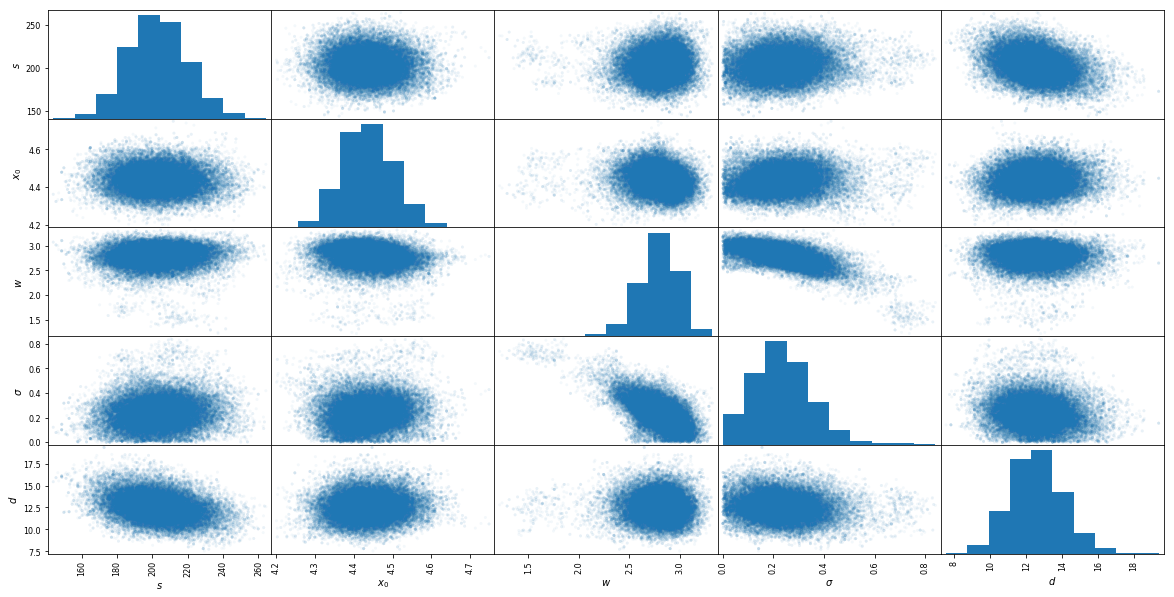

In [15]:
sm(para, alpha=0.05, figsize=(20,10))
show()

In [16]:
para.corr()

,$s$,$x_0$,$w$,$\sigma$,$d$
$s$,1.000000,-0.052086,0.047245,0.099389,-0.325533
$x_0$,-0.052086,1.000000,-0.173126,0.089790,0.073158
$w$,0.047245,-0.173126,1.000000,-0.646643,-0.039707
$\sigma$,0.099389,0.089790,-0.646643,1.000000,-0.130690
$d$,-0.325533,0.073158,-0.039707,-0.130690,1.000000


### It can be seen that there is a strong nagative correlation between $\sigma$ and $w$ :  the photons from the object are scattered by the atmosphere, resulting in Gaussian smearing. The spread of photon are both contributed by $\sigma$ and $w$(since the photon follows a straight line), if we increase the value of parameter $\sigma$, the $w$ will decrease to match the observation of the spread.

### weak negative correlation between $d$ and $s$ :   d represent the dark noise (thermal radiation), which can affect the obeservation of photon number. When there is an amount of photon number oberseved, it can be both the noise and the source. Higher thermal radiation parameter means fewer photon from source.

In [17]:
para.describe(percentiles=[.05, .95])

,$s$,$x_0$,$w$,$\sigma$,$d$
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,202.951222,4.436932,2.783243,0.236413,12.549975
std,16.602192,0.065809,0.207745,0.118420,1.452795
min,143.837907,4.201345,1.214834,0.000047,7.535600
5%,176.516503,4.332960,2.442250,0.055346,10.237940
50%,202.581095,4.434446,2.800893,0.227817,12.501768
95%,231.088953,4.548466,3.075114,0.436406,15.010572
max,264.214760,4.748346,3.320783,0.840418,19.362237


### 5% is lower bound of 90% central credible intervals;  95% is upper bound of 90% central credible intervals; and 50% is the median

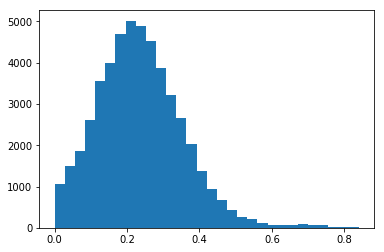

In [18]:
hist(sgA,bins=30)
show()

### As the histogram shows, it follows a gaussian but there is a cut off at 0, and compared with the nominal value of   $\sigma_0$=0.4 , it shifted to 0.236 ( the median), and $\sigma_{\sigma}$ change from 0.2 to 0.11, it is significantly improved as a result in this process.